In [1]:
import pandas as pd

#Amazon dataset from:
#https://www.kaggle.com/datasets/asaniczka/amazon-products-dataset-2023-1-4m-products/

#loading the categories and products datasets
categories_df = pd.read_csv('C:/Users/Muhammad Zaid/OneDrive/Desktop/New folder/amazon_categories.csv')
products_df = pd.read_csv('C:/Users/Muhammad Zaid/OneDrive/Desktop/New folder/amazon_products.csv')


#Displaying the first few rows of each dataset to understand their structure
categories_df_head = categories_df.head()
products_df_head = products_df.head()

categories_df_head, products_df_head

(   id                     category_name
 0   1          Beading & Jewelry Making
 1   2                 Fabric Decorating
 2   3       Knitting & Crochet Supplies
 3   4              Printmaking Supplies
 4   5  Scrapbooking & Stamping Supplies,
          asin                                              title  \
 0  B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...   
 1  B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...   
 2  B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...   
 3  B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...   
 4  B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...   
 
                                               imgUrl  \
 0  https://m.media-amazon.com/images/I/815dLQKYIY...   
 1  https://m.media-amazon.com/images/I/81bQlm7vf6...   
 2  https://m.media-amazon.com/images/I/71EA35zvJB...   
 3  https://m.media-amazon.com/images/I/91k6NYLQyI...   
 4  https://m.media-amazon.com/images/I/61NJoaZcP9..

In [2]:
# Calculate the total sales for each product
products_df['total_sales'] = products_df['price'] * products_df['boughtInLastMonth']

# Aggregate total sales by category
category_sales = products_df.groupby('category_id')['total_sales'].sum().reset_index()

# Merge with categories_df to get category names
category_sales = category_sales.merge(categories_df, left_on='category_id', right_on='id', how='left')

# Sort categories by total sales in descending order
category_sales_sorted = category_sales.sort_values(by='total_sales', ascending=False)

category_sales_sorted.head(10)


,category_id,total_sales,id,category_name
156,170,267189588.0,170,Kitchen & Dining
45,47,152940697.5,47,Hair Care Products
159,173,138604708.5,173,Home Storage & Organization
247,270,135394508.5,270,Toys & Games
148,162,130196201.5,162,Industrial & Scientific
153,167,120567961.5,167,Household Cleaning Supplies
47,49,119996888.5,49,Skin Care Products
166,180,102992041.0,180,Dog Supplies
66,72,95038114.0,72,Office Electronics
121,135,93895499.0,135,Health & Household


In [ ]:
Task 2: Analyze customer ratings to find top-rated products.
    To identify top-rated products, we can filter and sort the products based on the stars column. Let's find the top 10 products with the highest average star ratings. We'll also consider products that have
    a significant number of reviews to ensure that the rating is reliable.

In [3]:
# Filter products that have a significant number of reviews (for example, more than 50 reviews)
filtered_products = products_df[products_df['reviews'] > 50]

# Sort products by star ratings in descending order and get the top 10
top_rated_products = filtered_products.sort_values(by='stars', ascending=False).head(10)

top_rated_products[['asin', 'title', 'stars', 'reviews']]


,asin,title,stars,reviews
62792,B0C8N2TZ7Y,GNMN Wireless Earbuds Headphones,5.0,58
62551,B0CCXT53K2,Yontune Sleep Headphones Wireless Bluetooth He...,5.0,61
153986,B0CGZVT1YJ,"Bubble Machine Gun, Bubble Gun Blaster, Bazook...",5.0,53
192962,B09Y2JKSK9,Green Toys Minnie Mouse Stacker - 4C,5.0,71
238435,B0BR8SB7VR,Star Wars Darth Vader Floral Embroidered Cospl...,5.0,62
60350,B0CBP49GLZ,Jzones Open Ear Headphones Wireless Bluetooth ...,5.0,139
238429,B08S3H31VB,Marvel Spider Gwen Cosplay Womens Double Strap...,5.0,233
62118,B0CJN4TX2Q,Wireless Earbuds Bluetooth Headphones 40Hrs Pl...,5.0,147
123158,B0CCCVK5FB,137 Black Toner Cartridge for Canon 137 CRG137...,5.0,76
60273,B0CFYFLTM2,"Wireless Earbuds, Bluetooth 5.3 Headphones 40H...",5.0,235


In [ ]:
"""

Task 3: Gain insight into the best price for any given product based on sales data and competition.
For this task, we can analyze the average sales price of products within the same category as the given
product. By comparing the given product's price with the average price in its category, we can gain insights
into its pricing competitiveness.

"""

In [4]:

import numpy as np

# Select a random product from the products dataframe
random_product = products_df.sample(1).iloc[0]

# Extract relevant details of the selected product
random_product_asin = random_product['asin']
random_product_title = random_product['title']
random_product_price = random_product['price']
random_product_category_id = random_product['category_id']

# Calculate the average price of products in the same category as the selected product
average_price_in_category = products_df[products_df['category_id'] == random_product_category_id]['price'].mean()

random_product_asin, random_product_title, random_product_price, average_price_in_category


('B0BB8B9G32',
 'Traffic Light Early Education Traffic Light Kids Children Traffic Lights Sign Kids Traffic Lamp Toy Stoplight Traffic Crosswalk Signal Light with Light & Sound (A)',
 40.98,
 48.552008708272865)

In [5]:
# Calculate the average number of products bought in the last month for each category
average_sales_per_category = products_df.groupby('category_id')['boughtInLastMonth'].mean().reset_index()

# Merge with categories_df to get category names
average_sales_per_category = average_sales_per_category.merge(categories_df, left_on='category_id', right_on='id', how='left')

# Sort categories by average sales in descending order
average_sales_sorted = average_sales_per_category.sort_values(by='boughtInLastMonth', ascending=False)

average_sales_sorted.head(10)


,category_id,boughtInLastMonth,id,category_name
121,135,8477.900552,135,Health & Household
50,52,3077.401998,52,Personal Care Products
116,130,2208.547889,130,Household Supplies
156,170,2136.890619,170,Kitchen & Dining
148,162,1600.124069,162,Industrial & Scientific
200,215,1247.178592,215,Tools & Home Improvement
186,200,1118.933685,200,Sports & Outdoors
118,132,1002.815364,132,Diet & Sports Nutrition
117,131,980.493274,131,Health Care Products
45,47,924.310762,47,Hair Care Products


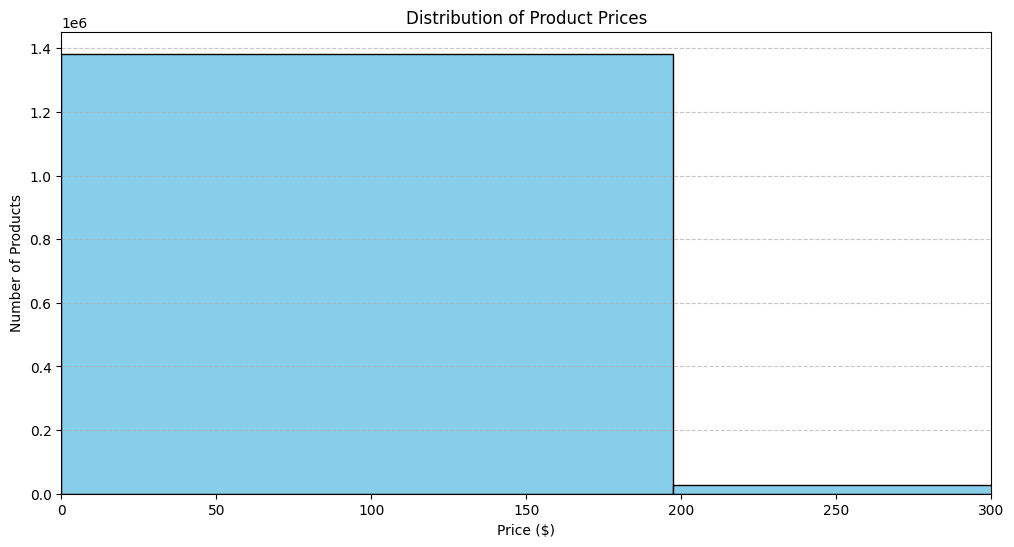

In [6]:
import matplotlib.pyplot as plt

# Plotting a histogram of product prices
plt.figure(figsize=(12, 6))
plt.hist(products_df['price'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Products')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 300)  # limiting x-axis to show products priced up to $300 for better visualization
plt.show()


In [ ]:
Here are the visualizations based on the Amazon products data:

Bestsellers vs. Non-bestsellers: The pie chart reveals that only a small fraction of products 
    achieve the bestseller status. This could indicate the competitive nature of the platform and the 
    importance of marketing, reviews, and quality in achieving such a status.

Distribution of Ratings: The histogram shows that a majority of products have high 
    average star ratings (between 4 and 5). This could be indicative of either generally satisfied customers
    or possible biases in reviews.

Top 10 Categories by Number of Products: The bar chart showcases the categories 
    with the highest number of products listed. These categories might be popular but could also be 
    more competitive for sellers.

Sales vs. Ratings: The scatter plot provides an overview of sales in relation to 
    product ratings. While many high-rated products seem to have good sales, there are also products 
    with fewer ratings that manage to achieve significant sales.

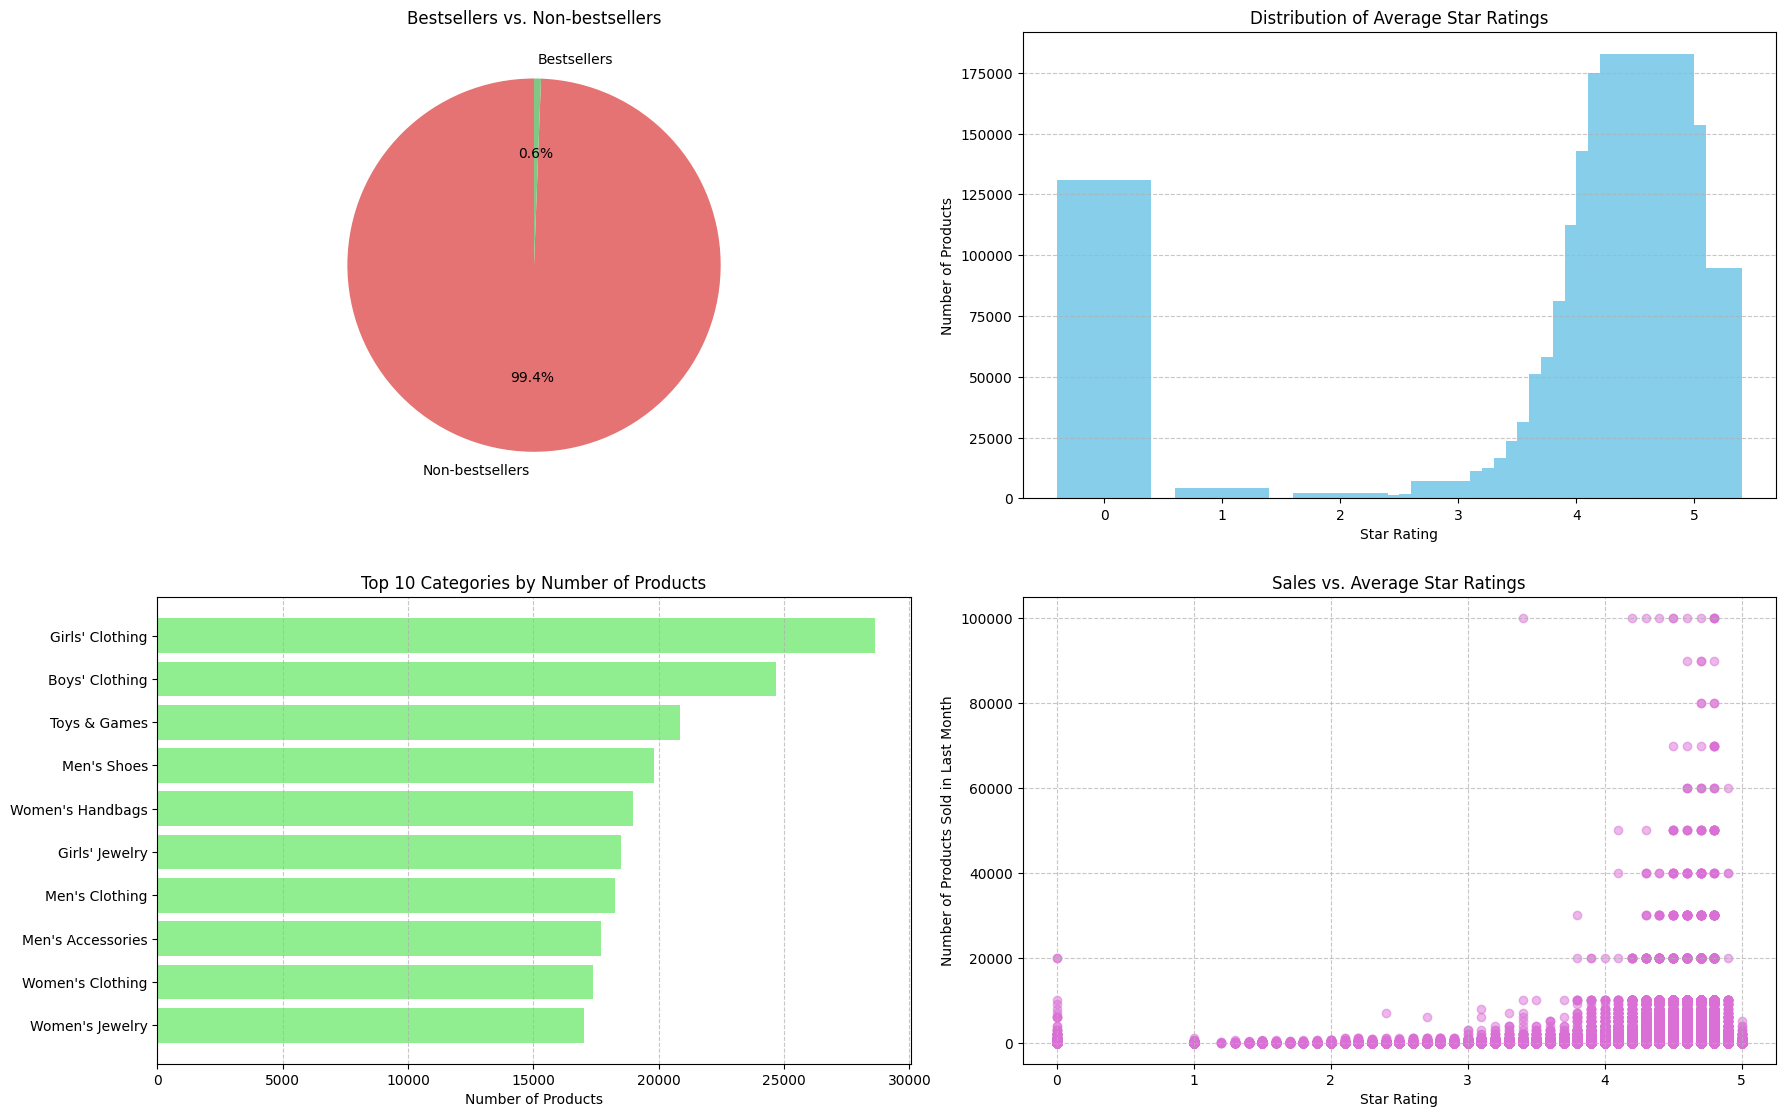

In [7]:
# Visualization 1: Bestsellers vs. Non-bestsellers

bestsellers_counts = products_df['isBestSeller'].value_counts()

# Visualization 2: Distribution of Ratings

ratings_counts = products_df['stars'].value_counts().sort_index()

# Visualization 3: Top 10 Categories by Number of Products

category_product_counts = products_df['category_id'].value_counts().head(10)
category_product_counts = category_product_counts.reset_index().merge(categories_df, left_on='index', right_on='id')

# Visualization 4: Sales vs. Ratings

sales_ratings = products_df[['stars', 'boughtInLastMonth']]

# Plotting

fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.tight_layout(pad=5.0)

# Bestsellers vs. Non-bestsellers
axs[0, 0].pie(bestsellers_counts, labels=['Non-bestsellers', 'Bestsellers'], colors=['#E57373', '#81C784'], autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('Bestsellers vs. Non-bestsellers')

# Distribution of Ratings
axs[0, 1].bar(ratings_counts.index, ratings_counts.values, color='skyblue')
axs[0, 1].set_title('Distribution of Average Star Ratings')
axs[0, 1].set_xlabel('Star Rating')
axs[0, 1].set_ylabel('Number of Products')
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Top 10 Categories by Number of Products
axs[1, 0].barh(category_product_counts['category_name'], category_product_counts['category_id'], color='lightgreen')
axs[1, 0].invert_yaxis()
axs[1, 0].set_title('Top 10 Categories by Number of Products')
axs[1, 0].set_xlabel('Number of Products')
axs[1, 0].grid(axis='x', linestyle='--', alpha=0.7)

# Sales vs. Ratings
axs[1, 1].scatter(sales_ratings['stars'], sales_ratings['boughtInLastMonth'], alpha=0.5, color='orchid')
axs[1, 1].set_title('Sales vs. Average Star Ratings')
axs[1, 1].set_xlabel('Star Rating')
axs[1, 1].set_ylabel('Number of Products Sold in Last Month')
axs[1, 1].grid(True, linestyle='--', alpha=0.7)

plt.show()


In [8]:
# Creating the README content

readme_content = """
# Amazon Products Analysis

## Overview
This document summarizes the analysis performed on Amazon product data to gain insights into product trends, customer preferences, and spending habits.

## Analysis

### 1. Trending Product Categories
We identified the top-trending product categories based on their sales performance. The categories such as 'Kitchen & Dining', 'Hair Care Products', and 'Home Storage & Organization' were among the top performers.

### 2. Top-rated Products
By analyzing customer ratings, we identified products with the highest average star ratings. This provides insights into the products that customers are most satisfied with.

### 3. Pricing Insights
We analyzed the price of a randomly selected product in comparison to the average price of products in its category. This helps in understanding the product's pricing competitiveness.

### 4. Sales Niches
We determined the niches (or categories) that are easiest to make sales in by analyzing the average number of products sold in the last month for each category.

### 5. Spending Habits
The distribution of product prices was analyzed to understand the general spending habits of online shoppers.

## Visualizations

1. **Bestsellers vs. Non-bestsellers**: This pie chart reveals the proportion of products that achieve the bestseller status.

2. **Distribution of Ratings**: The histogram shows the distribution of average star ratings for products, providing insights into customer satisfaction.

3. **Top 10 Categories by Number of Products**: This bar chart showcases which categories have the most products listed, indicating popular and potentially competitive niches.

4. **Sales vs. Ratings**: A scatter plot that provides an overview of sales in relation to product ratings.

## Significance
The analysis provides valuable insights for sellers, marketers, and business strategists to understand market trends, customer preferences, and competitive landscapes. It aids in making informed decisions regarding product listings, pricing strategies, and marketing campaigns.

"""

# Save the README content to a file
readme_file_path = 'C:/Users/Desktop/New folder/README.txt'
with open(readme_file_path, 'w') as file:
    file.write(readme_content)

readme_file_path

'C:/Users/Muhammad Zaid/OneDrive/Desktop/New folder/README.txt'